<a href="https://colab.research.google.com/github/gabriellbragaa/Vis-o_Computacional/blob/main/Lab02resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **01. Deixar a imagem do arquivo 'jato.jpg' mais amarelada usando transformação gamma**

Saving jato.jpg to jato (1).jpg


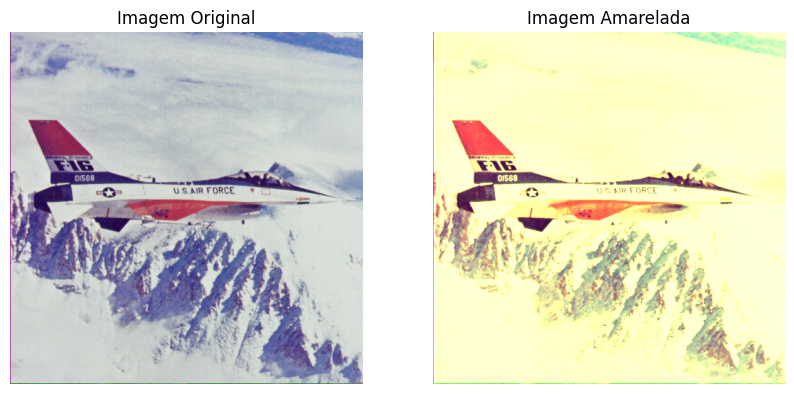

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Para carregar um arquivo
from google.colab import files
uploaded = files.upload()

# Obtenha o nome do arquivo carregado (supondo que seja apenas um arquivo)
filename = list(uploaded.keys())[0]

im = cv2.imread(filename)

# Verifica se a imagem foi carregada corretamente
if im is None:
    print(f"Erro ao carregar a imagem: {filename}")
else:
    # Converte a imagem de BGR para RGB para exibição com Matplotlib
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    # Divide a imagem em canais B, G, R
    b, g, r = cv2.split(im)

    # Para amarelar, aumentaremos a intensidade dos canais R e G em relação ao canal B.
    # Multiplicar os canais R e G por um fator maior que 1,
    # ou diminuir a intensidade do canal B por um fator menor que 1.

    # ajustar a porcentagem do amarelamento
    fator_amarelo = 2.1

    # Amarelei somente o r e o g
    r_amarelado = np.clip(r * fator_amarelo, 0, 255).astype(np.uint8)
    g_amarelado = np.clip(g * fator_amarelo, 0, 255).astype(np.uint8)

    # O canal azul pode ser mantido igual ou ligeiramente diminuído
    b_amarelado = b # Manter o canal azul igual

    # Combina os canais de volta
    im_amarelada_bgr = cv2.merge([b_amarelado, g_amarelado, r_amarelado])

    # Converte a imagem amarelada de BGR para RGB para exibição
    im_amarelada_rgb = cv2.cvtColor(im_amarelada_bgr, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(im_rgb)
    plt.title('Imagem Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(im_amarelada_rgb)
    plt.title('Imagem Amarelada')
    plt.axis('off')

    plt.show()


02. Utilizando como base as figuras ‘circle.jpg’ e ‘line.jpg’, forme o desenho de um “boneco
palito” aplicando uma sequência de transformações geométricas e operações lógicas nas
imagens, seguindo as regras abaixo.

 Upload do arquivo 'circle.jpg'.


Saving circle.jpg to circle (1).jpg
 Upload do arquivo 'line.jpg'.


Saving line.jpg to line (1).jpg


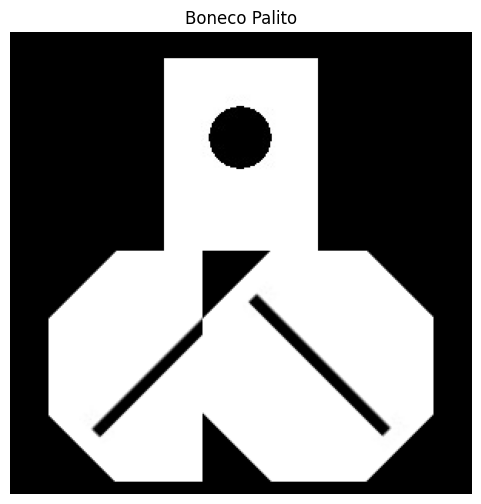

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Dimensões da imagem final
largura_final = 300
altura_final = 300


from google.colab import files

print(" Upload do arquivo 'circle.jpg'.")
uploaded_circle = files.upload()
filename_circle = list(uploaded_circle.keys())[0]

print(" Upload do arquivo 'line.jpg'.")
uploaded_line = files.upload()
filename_line = list(uploaded_line.keys())[0]

# Abre as imagens
im_head = cv2.imread(filename_circle, cv2.IMREAD_UNCHANGED) # Pode conter canal alpha
im_line = cv2.imread(filename_line, cv2.IMREAD_UNCHANGED)   # Pode conter canal alpha

# Verifica se as imagens foram carregadas corretamente
if im_head is None:
    print(f"Erro ao carregar a imagem da cabeça: {filename_circle}")
    exit()
if im_line is None:
    print(f"Erro ao carregar a imagem da linha: {filename_line}")
    exit()

# Converte para BGR se for escala de cinza, ou mantém BGR com alpha se houver
if len(im_head.shape) == 2: # Escala de cinza
    im_head = cv2.cvtColor(im_head, cv2.COLOR_GRAY2BGR)
elif im_head.shape[2] == 4: # BGR com Alpha
    im_head = cv2.cvtColor(im_head, cv2.COLOR_BGRA2BGR)

if len(im_line.shape) == 2: # Escala de cinza
    im_line = cv2.cvtColor(im_line, cv2.COLOR_GRAY2BGR)
elif im_line.shape[2] == 4: # BGR com Alpha
    im_line = cv2.cvtColor(im_line, cv2.COLOR_BGRA2BGR)


# --- Criar Imagem Final em Branco ---
# Cria uma imagem preta de 300x300 (ou branca, se preferir)
# Usaremos preto (0,0,0) como fundo
imagem_final = np.zeros((altura_final, largura_final, 3), dtype=np.uint8)

# Com o fundo branco:
# imagem_final = np.full((altura_final, largura_final, 3), 255, dtype=np.uint8)


# Tronco: Usa a imagem 'line.jpg' sem redimensionamento
im_tronco = im_line.copy()
altura_tronco, largura_tronco, _ = im_tronco.shape

# Braços: 75% do tamanho do tronco
fator_braço = 0.75
largura_braço = int(largura_tronco * fator_braço)
altura_braço = int(altura_tronco * fator_braço) # Assumindo que a linha é mais alta do que larga

# Redimensiona os braços
im_braço_esquerdo = cv2.resize(im_line, (largura_braço, altura_braço), interpolation=cv2.INTER_AREA)
im_braço_direito = cv2.resize(im_line, (largura_braço, altura_braço), interpolation=cv2.INTER_AREA)

# Pernas: Dobro do tamanho dos braços
fator_perna = 2.0
largura_perna = int(largura_braço * fator_perna)
altura_perna = int(altura_braço * fator_perna) # Assumindo proporção da linha original

# Redimensiona as pernas
im_perna_esquerda = cv2.resize(im_line, (largura_perna, altura_perna), interpolation=cv2.INTER_AREA)
im_perna_direita = cv2.resize(im_line, (largura_perna, altura_perna), interpolation=cv2.INTER_AREA)

# Rotacionar uma perna em 45 graus e a outra em -45 graus (ou 315)
angulo_perna = 45
# Centro de rotação (geralmente o centro da imagem)
(h, w) = im_perna_esquerda.shape[:2]
centro_rotacao = (w // 2, h // 2)

# Matriz de rotação para a perna esquerda (45 graus)
M_perna_esquerda = cv2.getRotationMatrix2D(centro_rotacao, angulo_perna, 1.0)
im_perna_esquerda_rotacionada = cv2.warpAffine(im_perna_esquerda, M_perna_esquerda, (w, h))

# Matriz de rotação para a perna direita (-45 graus)
M_perna_direita = cv2.getRotationMatrix2D(centro_rotacao, -angulo_perna, 1.0)
im_perna_direita_rotacionada = cv2.warpAffine(im_perna_direita, M_perna_direita, (w, h))


# Cabeça: Imagem 'circle.jpg' sem redimensionamento
im_cabeça = im_head.copy()
altura_cabeça, largura_cabeça, _ = im_cabeça.shape



# Posição do centro da imagem final
centro_x_final = largura_final // 2
centro_y_final = altura_final // 2

# Posição do topo do tronco
# Posicionar o topo do tronco um pouco abaixo do centro vertical para dar espaço para a cabeça
y_tronco_topo = centro_y_final - altura_tronco // 3

# Calcular as coordenadas de canto superior esquerdo para cada segmento

# Tronco: Centralizado horizontalmente, topo em y_tronco_topo
x_tronco = centro_x_final - largura_tronco // 2
y_tronco = y_tronco_topo

# Cabeça: Posicionada acima do tronco, centralizada horizontalmente
x_cabeça = centro_x_final - largura_cabeça // 2
y_cabeça = y_tronco - altura_cabeça

# Braços: Conectados ao tronco (aproximadamente no topo do tronco ou um pouco abaixo)
# Posição Y dos braços (mesmo que o topo do tronco ou um pouco abaixo)
y_braços = y_tronco + altura_tronco // 4

# Posição X do braço esquerdo
x_braço_esquerdo = x_tronco - largura_braço

# Posição X do braço direito
x_braço_direito = x_tronco + largura_tronco

# Pernas: Conectadas à parte inferior do tronco
y_pernas = y_tronco + altura_tronco - altura_perna // 2

# Posição X das pernas separação das pernas rotacionadas
separacao_pernas = largura_tronco // 2

x_perna_esquerda = centro_x_final - separacao_pernas - largura_perna // 2
x_perna_direita = centro_x_final + separacao_pernas - largura_perna // 2


# Segmentos na Imagem Final

# Função auxiliar para colar uma imagem (foreground) em um fundo (background) em uma posição (x, y)
def paste_image(background, foreground, x, y):
    h_fg, w_fg, _ = foreground.shape
    h_bg, w_bg, _ = background.shape

    # Calcular as regiões de interesse no fundo e no foreground
    y1 = max(0, y)
    y2 = min(h_bg, y + h_fg)
    x1 = max(0, x)
    x2 = min(w_bg, x + w_fg)

    y1_fg = y1 - y
    y2_fg = y2 - y
    x1_fg = x1 - x
    x2_fg = x2 - x

    # Verificar se as regiões de interesse são válidas
    if y2 > y1 and x2 > x1:
        # Extrair a região de interesse do foreground
        roi_fg = foreground[y1_fg:y2_fg, x1_fg:x2_fg]

        # Se o foreground tiver um canal alpha, usá-lo para mesclagem
        if foreground.shape[2] == 4:
            alpha_channel = roi_fg[:, :, 3] / 255.0
            color_channels = roi_fg[:, :, :3]
            inv_alpha_channel = 1.0 - alpha_channel

            # Mesclagem com base no canal alpha
            for c in range(0, 3):
                background[y1:y2, x1:x2, c] = (alpha_channel * color_channels[:, :, c] +
                                             inv_alpha_channel * background[y1:y2, x1:x2, c])
        else:
            # Se não houver canal alpha, simplesmente sobrepor
            background[y1:y2, x1:x2] = roi_fg


# Colocar o tronco
paste_image(imagem_final, im_tronco, x_tronco, y_tronco)

# Colocar a cabeça
paste_image(imagem_final, im_cabeça, x_cabeça, y_cabeça)

# Colocar os braços
paste_image(imagem_final, im_braço_esquerdo, x_braço_esquerdo, y_braços)
paste_image(imagem_final, im_braço_direito, x_braço_direito, y_braços)

# Colocar as pernas (rotacionadas)
paste_image(imagem_final, im_perna_esquerda_rotacionada, x_perna_esquerda, y_pernas)
paste_image(imagem_final, im_perna_direita_rotacionada, x_perna_direita, y_pernas)

# Converte para RGB para exibição com Matplotlib
imagem_final_rgb = cv2.cvtColor(imagem_final, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(imagem_final_rgb)
plt.title('Boneco Palito')
plt.axis('off') # Remove os eixos
plt.show()
#salvar a imagem resultante
cv2.imwrite('boneco_palito.png', imagem_final)